### Correlated data and uncertainty: An example

#### The "experiment" 
Consider a trebuchet like the ones that students build in ENGR 100.  (For those who haven't seen
ENGR 100 students on the science quad, a trebuchet is like a catapult.)  Consider a student who wants 
to figure out the speed of the mass hurled by a trebuchet. There is a low-tech way to determine the speed
using a stop watch to measure the time-of-flight, $t$, and a long measuring tape to determine the 
horizontal distance $x$ traveled by the mass.  (To keep the physics simple we assume that the effects
of air resistance are negligible, and we assume that the mass is launched from a small enough height 
that $\Delta y = 0$ between launch and landing.)

Breaking the motion into $x$-  and $y$-components gives the kineamatic equations

\begin{eqnarray*}
x &=& v_0\cos(\theta)\, t\\
\Delta y &=& 0 = v_0\sin(\theta)\, t - \frac{1}{2}gt^2
\end{eqnarray*}

It is straightforward to solve these equations for the velocity $v_0$ in terms of the measured 
quantities $x$ and $t$:

\begin{eqnarray*}
x &=& v_0\cos(\theta)\, t\\
\Delta y &=& 0 = v_0\sin(\theta)\, t - \frac{1}{2}gt^2
\end{eqnarray*}
  
Breaking the motion into $x$-  and $y$-components gives the kineamatic equations

\begin{eqnarray*}
x &=& v_0\cos(\theta)\, t\\
\Delta y &=& 0 = v_0\sin(\theta)\, t - \frac{1}{2}gt^2
\end{eqnarray*}

It is straightforward to solve these equations for the velocity $v_0$ in terms of the measured 
quantities $x$ and $t$:

$$
v_0(x,t) = \frac{x}{t}\sqrt{1 + \frac{g^2t^4}{4x^2}} = \sqrt{\frac{x^2}{t^2} + \frac{g^2t^2}{4}}.
$$

#### Uncertainty and correlation

From a single throw we get one value of $x$ and one value of $t$.  But student-built trebuchets don't
always release the masses at the same angle $\theta$ and the same speed $v_0$, so there will be 
variations in $x$ and $t$ from trial to trial.  To get an value of the average velocity $\bar v_0$ 
that includes an uncertainty requires multiple trials.  In the statistical analysis of multiple trials
we will make the simplifying assumptions that the uncertainties in $x$ and $t$ are negligiblr

+ we 


In [1]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def v(x,t):
    return np.sqrt(x**2/t**2 + g**2*t**2/4)

def dvdx(x,t):
    return x/t**2/v(x,t)

def dvdt(x,t):
    return (-3*x**2/t**3 + g**2*t/2)/v(x,t)/2

In [4]:
g = 9.8

nt = 1000

v_bar = 20
sigma_v = 1

theta_bar = 1*np.pi/8
sigma_theta = 2*np.pi/180

v0 = stats.norm.rvs(v_bar, sigma_v, nt)
theta = stats.norm.rvs(theta_bar, sigma_theta, nt)
#print(v0,theta)

#### Calculate values of $t^\ast$ and $x^\ast$

In [6]:
t_star = 2*v0*np.sin(theta)/g
x_star = v0*np.cos(theta)*t_star
#print(t_star, x_star)
#print(x_star)

#### Check inversion

In [39]:
#np.arctan(g*t_star**2/x_star/2)

#### Generate measured values

In [7]:
sigma_x = 0.0
sigma_t = 0.

x = stats.norm.rvs(x_star, sigma_x)
t = stats.norm.rvs(t_star, sigma_t)

In [49]:
#x,t

### Are $x$ and $t$ correlated?

<IPython.core.display.Javascript object>


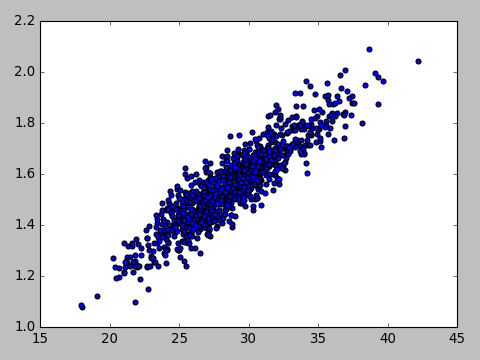

In [8]:
plt.figure()
plt.scatter(x,t);

In [9]:
np.mean(v(x,t)), np.std(v(x,t)), np.std(v(x,t))/np.sqrt(nt-1)

(19.987982771495975, 1.0189523605529427, 0.032238226010323626)

<IPython.core.display.Javascript object>


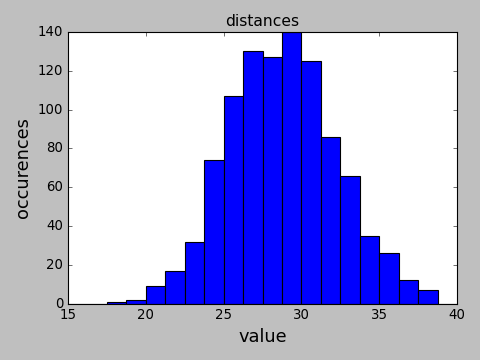

(array([  0.,   0.,   1.,   2.,   9.,  17.,  32.,  74., 107., 130., 127.,
        140., 125.,  86.,  66.,  35.,  26.,  12.,   7.,   0.]),
 array([15.  , 16.25, 17.5 , 18.75, 20.  , 21.25, 22.5 , 23.75, 25.  ,
        26.25, 27.5 , 28.75, 30.  , 31.25, 32.5 , 33.75, 35.  , 36.25,
        37.5 , 38.75, 40.  ]))

In [52]:
plt.figure()
nbins = 20
low = 15
high = 40
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("distances")
out = plt.hist(x, nbins, [low,high])
out[0],out[1]    # occurrences and bin boundaries

<IPython.core.display.Javascript object>


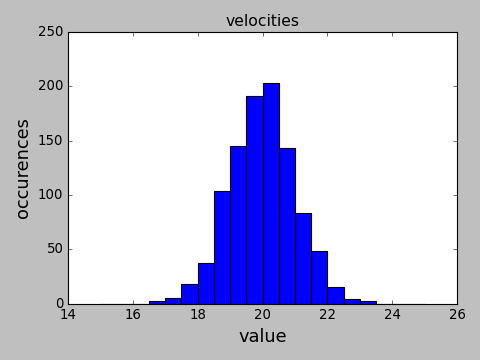

(array([  0.,   0.,   0.,   2.,   5.,  18.,  37., 104., 145., 191., 203.,
        143.,  83.,  48.,  15.,   4.,   2.,   0.,   0.,   0.]),
 array([15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
        20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]))

In [53]:
plt.figure()
nbins = 20
low = 15
high = 25
plt.xlabel("value")
plt.ylabel("occurences")
plt.title("velocities")
out = plt.hist(v(x,t), nbins, [low,high])
out[0],out[1]    # occurrences and bin boundaries

In [54]:
x_mean = np.mean(x)
x_std = np.std(x)
t_mean = np.mean(t)
t_std = np.std(t)

alpha_x = dvdx(x_mean, t_mean)*x_std
alpha_t = dvdt(x_mean, t_mean)*t_std
cov = sum((x-x_mean)*(t - t_mean))/(len(x)-1)
print(x_std, t_std)
print(alpha_x, alpha_t, cov)

3.5231991964062725 0.15463516187503337
2.0852871328495595 -2.2456182356080214 0.4966924433641925


In [55]:
print(np.sqrt(alpha_x**2 + alpha_t**2)/np.sqrt(nt-1))
alpha_v = np.sqrt(alpha_x**2 + alpha_t**2 + 2*dvdx(x_mean, t_mean)*dvdt(x_mean, t_mean)*cov)/np.sqrt(nt-1)
print(alpha_v)
print(dvdx(x_mean, t_mean)*dvdt(x_mean, t_mean))

0.09695681673216201
0.029218636594233568
-8.595206958444846


In [57]:
print(v(x_mean, t_mean))

19.99016150908409


### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [ ]:
%load_ext version_information

In [ ]:
%version_information numpy, scipy, matplotlib